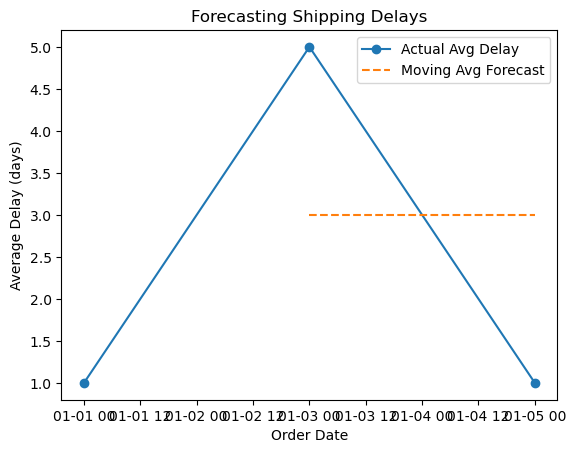

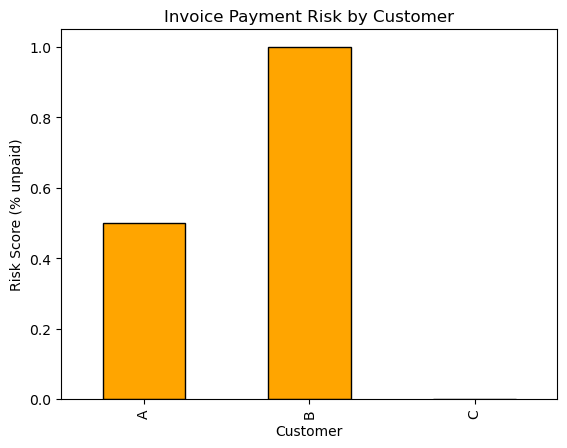

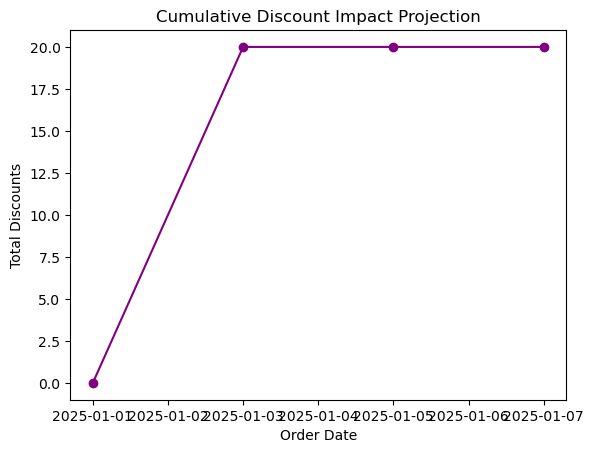

In [2]:
# ---------------- Day 6: Forecasting & Risk Insights ----------------

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load / reuse dataset
# (Assuming merged_df from Day 5 is available)
# If not, re-run your Day 5 merge code here
# merged_df = pd.merge(orders_df, invoices_df, on="OrderID")

#------------- Getting data ready - Move from previos dataset (day5) --------------------

# --- Sample Orders Data ---
orders = pd.DataFrame({
    "OrderID": [1,2,3,4],
    "Customer": ["A","B","C","A"],
    "OrderDate": pd.to_datetime(["2025-01-01","2025-01-03","2025-01-05","2025-01-07"]),
    "ShipDate": pd.to_datetime(["2025-01-02","2025-01-08","2025-01-06", None]),
    "Amount": [100,200,150,300]
})

# --- Sample Invoices Data ---
invoices = pd.DataFrame({
    "OrderID": [1,2,3,4],
    "InvoiceDate": pd.to_datetime(["2025-01-02","2025-01-08","2025-01-06","2025-01-10"]),
    "Paid": ["Yes","No","Yes","No"]
})

# --- Merge Orders + Invoices ---
merged_df = pd.merge(orders, invoices, on="OrderID", how="left")

# --- Calculate Shipping Delay ---
merged_df["ShipDelay"] = (merged_df["ShipDate"] - merged_df["OrderDate"]).dt.days

# --- Flag Late Shipments (>5 days) ---
merged_df["LateShipment"] = merged_df["ShipDelay"] > 2

# --- Apply 10% Discount for Late Shipments ---
merged_df["LateDiscount"] = merged_df.apply(
    lambda row: row["Amount"]*0.1 if row["LateShipment"] else 0, axis=1
)    
#--------------------------

# 3. Shipping Delay Forecast (Moving Average)
delay_trend = merged_df.groupby("OrderDate")["ShipDelay"].mean()

moving_avg = delay_trend.rolling(window=2).mean()

plt.plot(delay_trend.index, delay_trend.values, label="Actual Avg Delay", marker="o")
plt.plot(moving_avg.index, moving_avg.values, label="Moving Avg Forecast", linestyle="--")
plt.title("Forecasting Shipping Delays")
plt.xlabel("Order Date")
plt.ylabel("Average Delay (days)")
plt.legend()
plt.show()

# 4. Invoice Payment Risk (Customer-level)
payment_risk = merged_df.groupby("Customer")["Paid"].apply(lambda x: (x=="No").mean())

payment_risk.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Invoice Payment Risk by Customer")
plt.ylabel("Risk Score (% unpaid)")
plt.show()

# 5. Discount Impact Projection
discount_trend = merged_df.groupby("OrderDate")["LateDiscount"].sum().cumsum()

plt.plot(discount_trend.index, discount_trend.values, color="purple", marker="o")
plt.title("Cumulative Discount Impact Projection")
plt.xlabel("Order Date")
plt.ylabel("Total Discounts")
plt.show()

#--------------------------------- End of Day 6 ---------------------
